# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1.Read the dataset to the python environment

In [2]:
data=pd.read_excel(r"C:\Users\User\Downloads\IRIS.xls")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.shape

(150, 5)

# 2.Do necessary pre-processing steps

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
#Filling the missing values

In [8]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [31]:
x=data.drop(['Classification'],axis=1)
y=(data['Classification'])

In [10]:
data.groupby('Classification')[['SL']].median()

,SL
Classification,
Iris-setosa,5.00
Iris-versicolor,5.85
Iris-virginica,6.50


In [11]:
data.groupby('Classification')[['SW']].median()

,SW
Classification,
Iris-setosa,3.4
Iris-versicolor,2.8
Iris-virginica,3.0


In [12]:
data.groupby('Classification')[['PL']].median()

,PL
Classification,
Iris-setosa,1.50
Iris-versicolor,4.35
Iris-virginica,5.55


In [13]:
data['SL'] = data['SL'].fillna(data.groupby('Classification')['SL'].transform('median'))
data['SW'] = data['SW'].fillna(data.groupby('Classification')['SW'].transform('median'))
data['PL'] = data['PL'].fillna(data.groupby('Classification')['PL'].transform('median'))

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Checking outliers

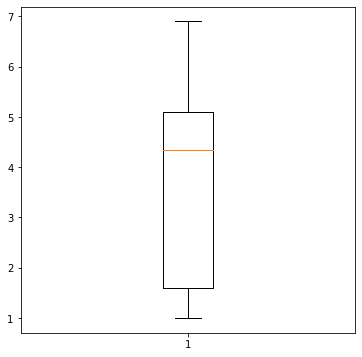

In [15]:
#Checking the outliers in "PL" column by plotting a boxplot
plt.figure(figsize=(6,6))
plt.boxplot(data["PL"])
plt.show()

There are no outliers.

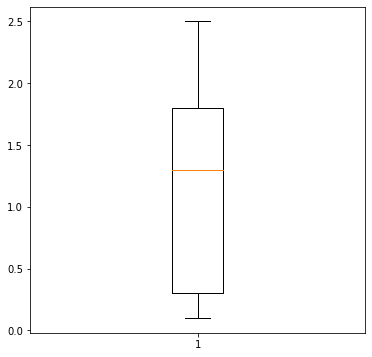

In [16]:
#Checking the outliers in "PW" column by plotting a boxplot
plt.figure(figsize=(6,6))
plt.boxplot(data["PW"])
plt.show()

There are no outliers

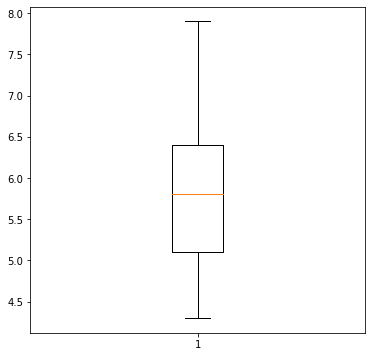

In [17]:
#Checking the outliers in "SL" column by plotting a boxplot
plt.figure(figsize=(6,6))
plt.boxplot(data["SL"])
plt.show()

There are no outliers 

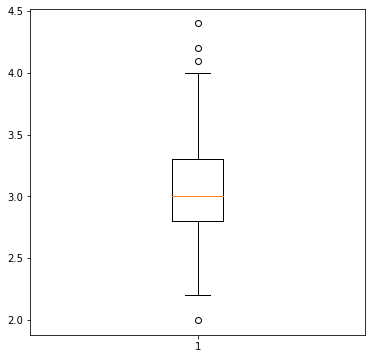

In [18]:
#Checking the outliers in "SW" column by plotting a boxplot
plt.figure(figsize=(6,6))
plt.boxplot(data["SW"])
plt.show()

In [19]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


In [20]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.05
4.05


In [21]:
outlier=[]
for x in data['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier        

[4.4, 4.1, 4.2, 2.0]

In [22]:
ind1=data['SW']>up_lim
data.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [23]:
data.drop([14, 15, 32, 33],inplace=True)

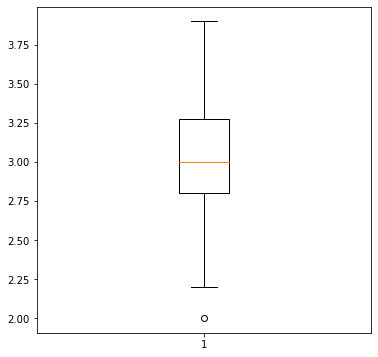

In [24]:
plt.figure(figsize=(6,6))
plt.boxplot(data["SW"])
plt.show()

In [25]:
#Label encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
binary_features= ['Classification']   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    data[i] = label_encoders[i].fit_transform(data[i])  

In [27]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.0,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,5.55,2.0,2
148,6.2,3.4,5.40,2.3,2


In [28]:
#Splitting of data

In [32]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
data.shape

(146, 5)

In [34]:
x_train.shape

(116, 4)

# 3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

# Logistic Regression

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]


0.9666666666666667

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


0.9333333333333333

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [40]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


0.9333333333333333

# Kernel SVM

In [41]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [42]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]


0.9666666666666667

# Decision tree classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_predict=dt_model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9333333333333333

In [44]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

# GRADIENT BOOSTING CLASSIFIER

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_predict=GBC.predict(x_test)
accuracy_score(y_test,y_predict)

0.9333333333333333

In [47]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [48]:
#All the classification models gives the best result to predict iris species and performs good